In [1]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [9]:
print(df.shape)

(891, 15)


In [10]:
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [11]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [13]:
df = df[['pclass', 'sex', 'age', 'fare', 'alive', 'alone', 'survived']]

In [14]:
df = df.dropna()

In [15]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [16]:
df['alone'] = df['alone'].map({'yes':0, 'no':1})

In [17]:
df['alive'] = df['alive'].map({'True':0, 'False':1})

In [18]:
X = df[['pclass', 'sex', 'age', 'fare', 'alive', 'alone']]
y = df['survived']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print("Accuracy:", acc)

Accuracy: 0.6993006993006993


In [23]:
pclass = int(input("Enter class (1,2,3): "))
sex = input("Enter gender (male/female): ")
age = float(input("Enter age: "))
fare = float(input("Enter fare: "))
alive = input("Is the person alive? (True/False): ")
alone = input("Is the person alone? (True/False): ")


sex_num = 0 if sex.lower() == "male" else 1
alive_num = 0 if alive.lower() == "true" else 1
alone_num = 0 if alone.lower() == "true" else 1


prediction = clf.predict([[pclass, sex_num, age, fare, alive_num, alone_num]])[0]
result = "Survived ✅" if prediction == 1 else "Not Survived ❌"
print("Prediction:", result)

Enter class (1,2,3): 2
Enter gender (male/female): female
Enter age: 23
Enter fare: 8
Is the person alive? (True/False): True
Is the person alone? (True/False): False
Prediction: Survived ✅


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


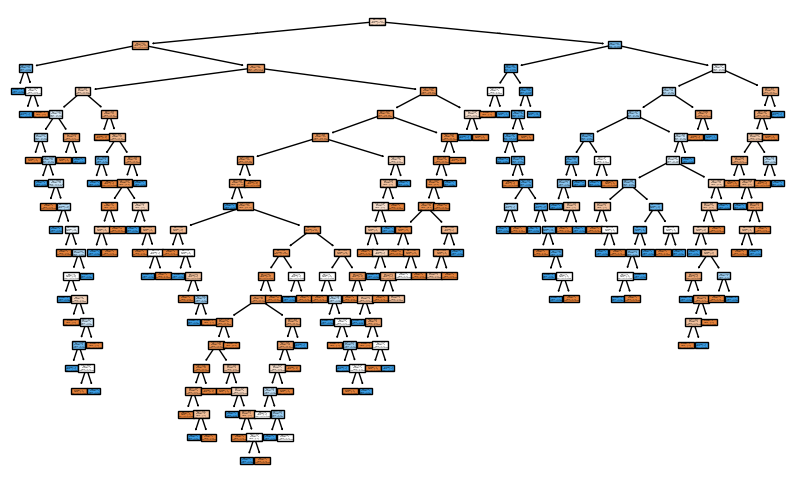

In [24]:
plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()